In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from data_analysis import run_tsne, plot_tsne

In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
DATAFOLDER = 'C:/Users/BiSBII/Documents/plantdb/omics_data/RNAseq'

In [3]:
metabolomics_file = 'metabolomics.xlsx'
metadata_file = 'metabolomics_metadata.csv'

In [4]:
data_mets = pd.read_excel(os.path.join(DATAFOLDER, metabolomics_file), index_col=0, header=1)
metadata_mets = pd.read_csv(os.path.join(DATAFOLDER, metadata_file), index_col=0)
data_mets = data_mets.loc[:, data_mets.columns != 'Method']
data_mets.shape

(212, 219)

In [5]:
data_mets = data_mets.transpose()
data_mets.shape

(219, 212)

In [ ]:
data_mets

In [6]:
y_state = metadata_mets['factor']
y_cv = metadata_mets['cultivar']
y_year = metadata_mets['vintage']

In [ ]:
values = y_state.value_counts()
print(values)

plt.pie(values , labels = values.index, autopct='%1.1f%%')
# plt.savefig('pie_state.png')
plt.show()

In [ ]:
values = y_cv.value_counts()
print(values)

plt.pie(values , labels = values.index, autopct='%1.1f%%')
# plt.savefig('pie_cv.png')
plt.show()

In [ ]:
values = y_year.value_counts()
print(values)

plt.pie(values , labels = values.index, autopct='%1.1f%%')
# plt.savefig('pie_year.png')
plt.show()

In [ ]:
df_tsne = run_tsne(n_components=2, data=data_mets)

In [ ]:
df_tsne

In [ ]:
df_tsne['factor'] = y_state

In [ ]:
plot_tsne(data=df_tsne, name_fig='tsne_metabolomics_state', title='t-SNE for metabolomics data')

In [ ]:
df_tsne['factor'] = y_cv

In [ ]:
plot_tsne(data=df_tsne, name_fig='tsne_metabolomics_cv', title='t-SNE for metabolomics data')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_mets)
df_data_scaled = pd.DataFrame(data_scaled, columns=data_mets.columns,
                              index=data_mets.index)
df_data_scaled.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_data_scaled, y_state, test_size=0.20, random_state=42)

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Precision: %0.2f' % precision_score(y_test, y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, y_pred))

In [ ]:
from sklearn import svm

In [ ]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

svm_y_pred = svm_model.predict(X_test)

print('PECC (Accuracy): %0.2f' % svm_model.score(X_test, y_test))

print('Precision: %0.2f' % precision_score(y_test, svm_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, svm_y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, svm_y_pred))

In [ ]:
coefs = svm_model.coef_
feature_importance = pd.DataFrame(coefs.transpose(), index=df_data_scaled.columns, columns=['coef'])
feature_importance['mean_coef'] = abs(feature_importance).mean(axis=1)
feature_importance.sort_values(by=['mean_coef'], ascending=False)

# NO REPLICATES

In [7]:
data_source = 'C:/Users/BiSBII/Documents/MM_ML/data/'

In [8]:
metadata_mets_conv = pd.read_excel(os.path.join(data_source, 'metabolomics_metadata.xlsx'), sheet_name='CONVERSION', index_col=0)

In [9]:
data_mets_noreps = data_mets.groupby(metadata_mets_conv['groups']).mean()
data_mets_noreps

Metabolite Name,xylose,xylonic acid,vanillic acid,valine,urea,uracil,UDP-glucuronic acid,tyrosol,tyrosine,tryptophan,...,proline,quercetin-3-glucoside,quercetin-3-glucuronide,resveratrol,resveratrol dimer (pallidol or viniferin),spirotetramat,splitomicin,taxifolin,tributyl phosphate,tyrosine
groups,,,,,,,,,,,,,,,,,,,,,
CS_time0_2012,3.731010,0.286863,0.117069,1.730116,1.216265,0.086685,0.650581,0.110813,1.387846,4.603217,...,98.838524,0.923180,20.703345,0.000318,0.000000,10.575021,0.000000,0.000000,75.369803,0.140542
CS_time0_2013,3.248436,0.571939,0.219839,0.758713,1.244861,0.202860,1.277033,0.256479,1.069705,1.967828,...,1040.845728,12.307100,77.785800,1.187485,0.000000,38.528039,0.000000,0.029844,0.000000,0.000000
CS_time0_2014,2.293119,0.529937,0.495085,1.361930,1.078642,0.563003,1.026810,0.618409,0.858803,1.293119,...,138.256017,6.642696,60.868062,1.184399,0.262894,0.000000,0.000000,0.880047,0.000000,0.000000
CS_time10_2012,1.701519,0.908847,0.124218,6.172475,1.798034,0.141197,1.705094,0.134942,56.835567,0.456658,...,210.242434,21.346971,14.397728,0.000000,0.000000,4.236117,0.000000,0.000000,68.386685,0.087802
CS_time10_2013,1.420912,0.709562,0.271671,2.251117,0.851653,0.204647,1.277033,0.285970,1.787310,0.618409,...,5721.521059,131.340072,67.179783,4.141035,0.000000,4.742720,0.000000,6.002407,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PN_time8_2013,1.707775,0.602324,0.257373,4.428061,3.485255,0.255585,1.798928,0.223414,2.071492,1.488829,...,2433.909025,114.427437,113.285199,229.844525,5.813718,2.628640,0.000000,137.692419,0.000000,0.000000
PN_time8_2014,3.496872,0.741734,0.422699,2.621984,0.950849,0.455764,1.350313,0.547811,2.064343,1.639857,...,948.846056,34.157383,41.083211,65.457904,3.085765,0.000000,0.000000,63.440024,0.000000,0.000000
PN_time9_2012,2.193923,0.753351,0.097408,5.401251,1.716711,0.186774,2.283289,0.115282,1.880250,1.210009,...,88.710237,13.866339,27.864049,1.297096,4.812534,2.476580,6.371248,9.098453,14.831962,0.378103


In [19]:
Xtrain_RNAseq = pd.read_csv(os.path.join('C:/Users/BiSBII/Documents/MM_ML/data', 'DIABLO_INPUT', 'XTRAIN_RNASEQ_ALL_500_GENES_NOREPS_NEWSPLIT.csv'), index_col=0)

In [20]:
Xtrain_mets = data_mets_noreps.loc[Xtrain_RNAseq.index, :]

In [21]:
Xtest_RNAseq = pd.read_csv(os.path.join('C:/Users/BiSBII/Documents/MM_ML/data', 'DIABLO_INPUT', 'XTEST_RNASEQ_ALL_500_GENES_NOREPS_NEWSPLIT.csv'), index_col=0)

In [22]:
Xtest_mets = data_mets_noreps.loc[Xtest_RNAseq.index, :]

vt filter

In [23]:
vt = VarianceThreshold(0).fit(Xtrain_mets)
X_train_filtered = vt.transform(Xtrain_mets)
X_test_filtered = vt.transform(Xtest_mets)
cols_inds_vt = vt.get_support(indices=True)
X_train_filtered_df = pd.DataFrame(X_train_filtered, index=Xtrain_mets.index, columns=Xtrain_mets.columns[cols_inds_vt])
X_test_filtered_df = pd.DataFrame(X_test_filtered, index=Xtest_mets.index, columns=Xtest_mets.columns[cols_inds_vt])

X_train_filtered_df.shape

C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a fu

(58, 208)

scaling the data before saving

In [24]:
scaler_model = StandardScaler().fit(X_train_filtered_df)
X_train_scaled = scaler_model.transform(X_train_filtered_df)
X_test_scaled = scaler_model.transform(X_test_filtered_df)

C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a fu

In [25]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_filtered_df.columns, index=X_train_filtered_df.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_filtered_df.columns, index=X_test_filtered_df.index)

In [26]:
X_train_scaled_df.to_csv(os.path.join('C:/Users/BiSBII/Documents/MM_ML/data', 'DIABLO_INPUT', 'XTRAIN_METABOLOMICS_NOREPS_VT_NEWSPLIT.csv'))

In [27]:
X_test_scaled_df.to_csv(os.path.join('C:/Users/BiSBII/Documents/MM_ML/data', 'DIABLO_INPUT', 'XTEST_METABOLOMICS_NOREPS_VT_NEWSPLIT.csv'))

# several splits

In [11]:
for i in range(5):
    
    print(i)
    
    Xtrain_RNAseq = pd.read_csv(os.path.join('C:/Users/BiSBII/Documents/MM_ML/data', 'DIABLO_INPUT', 'XTRAIN_RNASEQ_ALL_GENES_NOREPS_SPLIT_'+ str(i) +'.csv'), index_col=0)
    
    Xtrain_mets = data_mets_noreps.loc[Xtrain_RNAseq.index, :]
    
    Xtest_RNAseq = pd.read_csv(os.path.join('C:/Users/BiSBII/Documents/MM_ML/data', 'DIABLO_INPUT', 'XTEST_RNASEQ_ALL_GENES_NOREPS_SPLIT_'+ str(i) +'.csv'), index_col=0)
    
    Xtest_mets = data_mets_noreps.loc[Xtest_RNAseq.index, :]
    
    vt = VarianceThreshold(0).fit(Xtrain_mets)
    X_train_filtered = vt.transform(Xtrain_mets)
    X_test_filtered = vt.transform(Xtest_mets)
    cols_inds_vt = vt.get_support(indices=True)
    X_train_filtered_df = pd.DataFrame(X_train_filtered, index=Xtrain_mets.index, columns=Xtrain_mets.columns[cols_inds_vt])
    X_test_filtered_df = pd.DataFrame(X_test_filtered, index=Xtest_mets.index, columns=Xtest_mets.columns[cols_inds_vt])
    
    scaler_model = StandardScaler().fit(X_train_filtered_df)
    X_train_scaled = scaler_model.transform(X_train_filtered_df)
    X_test_scaled = scaler_model.transform(X_test_filtered_df)
    
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_filtered_df.columns, index=X_train_filtered_df.index)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_filtered_df.columns, index=X_test_filtered_df.index)
    
    X_train_scaled_df.to_csv(os.path.join('C:/Users/BiSBII/Documents/MM_ML/data', 'DIABLO_INPUT', 'XTRAIN_METABOLOMICS_NOREPS_VT_SPLIT_'+ str(i) +'.csv'))
    X_test_scaled_df.to_csv(os.path.join('C:/Users/BiSBII/Documents/MM_ML/data', 'DIABLO_INPUT', 'XTEST_METABOLOMICS_NOREPS_VT_SPLIT_'+ str(i) +'.csv'))

0
1


C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a fu

2
3


C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a fu

4


C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a fu

# apply ML

In [21]:
y_train_df = pd.read_csv(os.path.join('C:/Users/BiSBII/Documents/MM_ML/data', 'DIABLO_INPUT', 'yTRAIN_MODEL_500_GENES_NOREPS.csv'), index_col=0)
y_train = y_train_df['state']

In [22]:
y_test_df = pd.read_csv(os.path.join('C:/Users/BiSBII/Documents/MM_ML/data', 'DIABLO_INPUT', 'yTEST_MODEL_500_GENES_NOREPS.csv'), index_col=0)
y_test = y_test_df['state']

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [80]:
clf = LogisticRegression(random_state=0).fit(X_train_scaled_df, y_train)
y_pred = clf.predict(X_test_scaled_df)

print('Precision: %0.2f' % precision_score(y_test, y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, y_pred))

Precision: 0.94
Recall: 0.93
Accuracy: 0.93


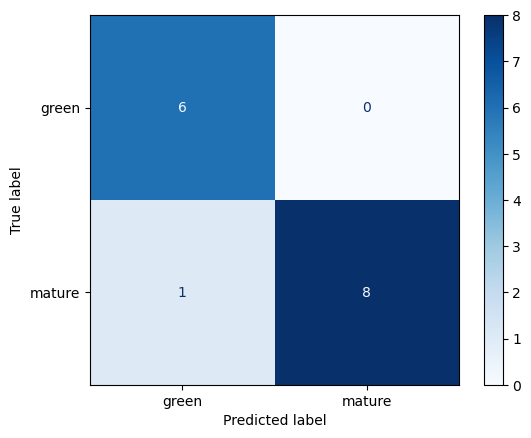

In [81]:
cm_lr = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=clf.classes_, cmap='Blues')

In [82]:
coefs = clf.coef_
feature_importance = pd.DataFrame(coefs.transpose(), index=X_train_scaled_df.columns, columns=['coef'])
feature_importance['mean_coef'] = abs(feature_importance).mean(axis=1)
feature_importance.sort_values(by=['mean_coef'], ascending=False)

,coef,mean_coef
Metabolite Name,,
UDP-glucuronic acid,0.228326,0.228326
malic acid,-0.213346,0.213346
malvidin-3-O-glucoside,0.206396,0.206396
cyanidin 3-glucoside,0.195955,0.195955
petunidin,0.187563,0.187563
...,...,...
pyruvic acid,0.000736,0.000736
L-arginine,0.000000,0.000000
procyanidin B2,0.000000,0.000000


In [77]:
svm_model = svm.SVC(kernel = "linear")
svm_model.fit(X_train_scaled_df, y_train)

svm_y_pred = svm_model.predict(X_test_scaled_df)

print('PECC (Accuracy): %0.2f' % svm_model.score(X_test_scaled_df, y_test))

print('Precision: %0.2f' % precision_score(y_test, svm_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, svm_y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, svm_y_pred))

PECC (Accuracy): 0.80
Precision: 0.81
Recall: 0.80
Accuracy: 0.80


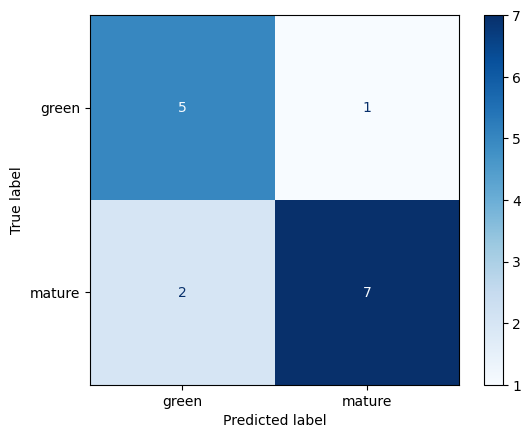

In [35]:
svm_cm = ConfusionMatrixDisplay.from_predictions(y_test, svm_y_pred, display_labels=svm_model.classes_, cmap='Blues')

In [38]:
coefs = svm_model.coef_
feature_importance = pd.DataFrame(coefs.transpose(), index=X_train_scaled_df.columns, columns=['coef'])
feature_importance['mean_coef'] = abs(feature_importance).mean(axis=1)
feature_importance.sort_values(by=['mean_coef'], ascending=False)

,coef,mean_coef
Metabolite Name,,
L-aspartic acid,-0.084310,0.084310
resveratrol,0.083227,0.083227
cyanidin 3-glucoside,0.071894,0.071894
peonidin-3-glucoside,0.070541,0.070541
malvidin-3-O-glucoside,0.068197,0.068197
...,...,...
montanic acid,0.000078,0.000078
L-arginine,0.000000,0.000000
procyanidin B2,0.000000,0.000000


In [70]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_scaled_df, y_train)

rf_y_pred = rf_model.predict(X_test_scaled_df)

print('Precision: %0.2f' % precision_score(y_test, rf_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, rf_y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, rf_y_pred))

Precision: 0.94
Recall: 0.93
Accuracy: 0.93


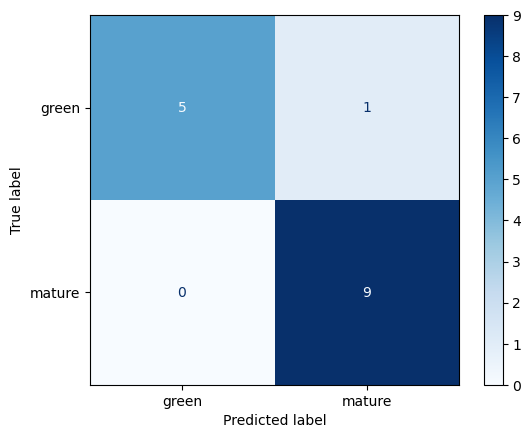

In [78]:
rf_cm = ConfusionMatrixDisplay.from_predictions(y_test, rf_y_pred, display_labels=rf_model.classes_, cmap='Blues')

In [71]:
importances = rf_model.feature_importances_
importances_df = pd.DataFrame(importances, columns=['importance'], index=X_train_scaled_df.columns)
importances_df.sort_values(by=['importance'], ascending=False)

,importance
Metabolite Name,
sucrose,0.092959
glucose,0.063307
petunidin,0.055667
myricetin,0.047974
fructose,0.042966
...,...
butyraldehyde,0.000000
"butane-2,3-diol NIST",0.000000
phenylethanol NIST,0.000000
